In [4]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

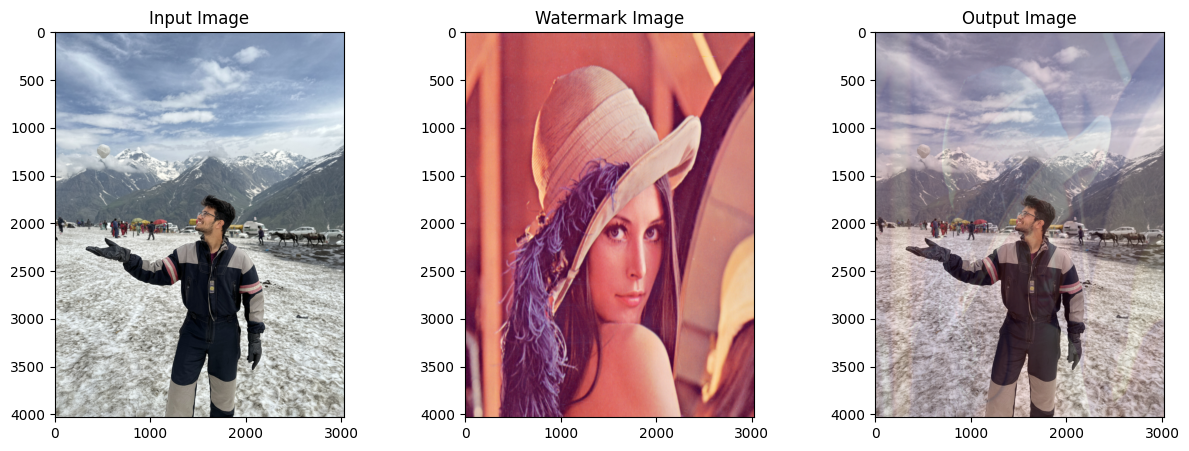

In [5]:
def embed_watermark(input_image, watermark_image):
    img = cv2.imread(input_image)
    watermark = cv2.imread(watermark_image, cv2.IMREAD_UNCHANGED)

    # Resize watermark to fit input image
    watermark = cv2.resize(watermark, (img.shape[1], img.shape[0]))

    # Blend watermark with input image
    alpha = 0.8  # Adjust alpha for blending intensity
    beta = (1.0 - alpha)
    watermarked_img = cv2.addWeighted(img, alpha, watermark, beta, 0.0)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Input Image")
    axes[1].imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Watermark Image")
    axes[2].imshow(cv2.cvtColor(watermarked_img, cv2.COLOR_BGR2RGB))
    axes[2].set_title("Output Image")

embed_watermark( '../uday.jpg', '../Lena.png')


<class 'numpy.ndarray'> (1008, 756, 3) <class 'numpy.ndarray'> (4032, 3024, 3)


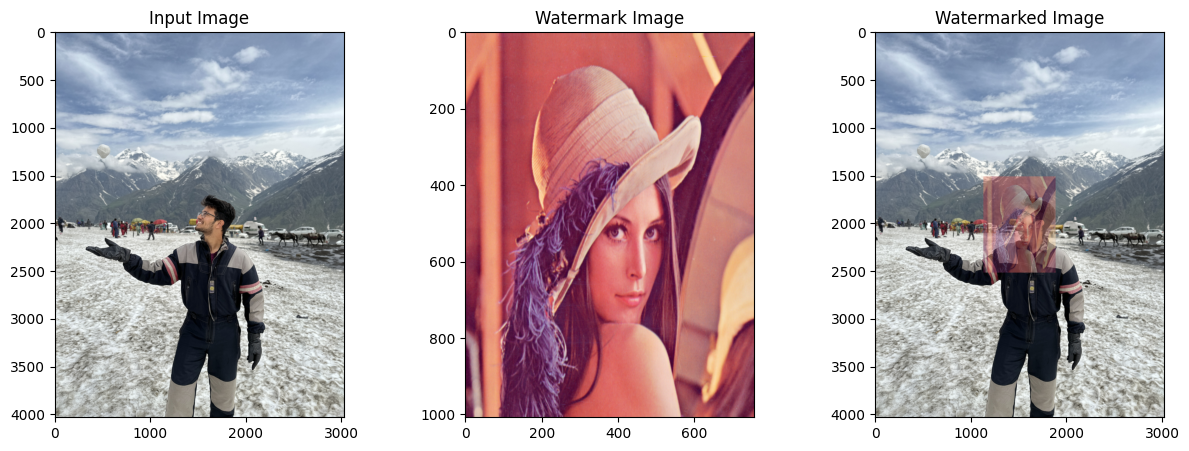

In [6]:
def embed_watermark(input_image, watermark_image, position='center', size_ratio=0.2, alpha=0.8):
    # Read input image and watermark image
    img = cv2.imread(input_image)
    watermark = cv2.imread(watermark_image, cv2.IMREAD_UNCHANGED)

    # Get input image dimensions
    img_height, img_width = img.shape[:2]

    # Calculate the size of the watermark based on the input image size and the specified ratio
    watermark_height = int(img_height * size_ratio)
    watermark_width = int(img_width * size_ratio)
    watermark_resized = cv2.resize(watermark, (watermark_width, watermark_height))

    # Calculate the position of the watermark based on the specified position
    if position == 'center':
        x_offset = (img_width - watermark_width) // 2
        y_offset = (img_height - watermark_height) // 2
    elif position == 'top_left':
        x_offset = 0
        y_offset = 0
    elif position == 'top_right':
        x_offset = img_width - watermark_width
        y_offset = 0
    elif position == 'bottom_left':
        x_offset = 0
        y_offset = img_height - watermark_height
    elif position == 'bottom_right':
        x_offset = img_width - watermark_width
        y_offset = img_height - watermark_height
    else:
        raise ValueError("Invalid position. Please use 'center', 'top_left', 'top_right', 'bottom_left', or 'bottom_right'.")

    # Overlay the watermark onto the input image
    # print(img_width, img_height, watermark_width, watermark_height, x_offset, y_offset)
    print(type(watermark_resized), watermark_resized.shape, type(img), img.shape)


    watermarked_img = img.copy()
    watermarked_img[y_offset:y_offset+watermark_height, x_offset:x_offset+watermark_width] = \
        cv2.addWeighted(img[y_offset:y_offset+watermark_height, x_offset:x_offset+watermark_width], alpha, watermark_resized, 1 - alpha, 0)

    # Display input image, watermark image, and watermarked image
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Input Image")
    axes[1].imshow(cv2.cvtColor(watermark_resized, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Watermark Image")
    axes[2].imshow(cv2.cvtColor(watermarked_img, cv2.COLOR_BGR2RGB))
    axes[2].set_title("Watermarked Image")
    plt.show()


embed_watermark('../uday.jpg', '../Lena.png', position='center', size_ratio=0.25, alpha=0.5)


Initial size: 2857862 bytes
Final size: 746723 bytes
Size reduced by: 73.87%


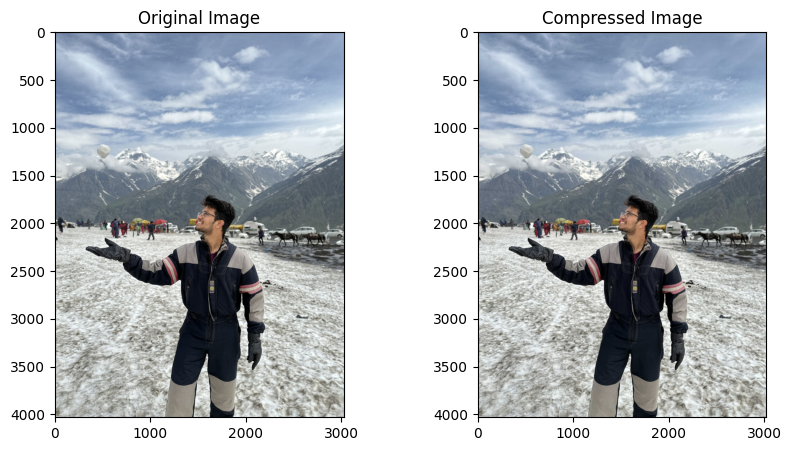

In [14]:
def compress_image(image_path, output_path, quality):
    # Read the image
    image = cv2.imread(image_path)

    # Get the initial file size
    initial_size = os.path.getsize(image_path)

    
    cv2.imwrite(output_path, image, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # Get the final file size
    final_size = os.path.getsize(output_path)

    # Calculate and print the size reduction
    reduction = 100 * (initial_size - final_size) / initial_size
    print(f"Initial size: {initial_size} bytes")
    print(f"Final size: {final_size} bytes")
    print(f"Size reduced by: {reduction:.2f}%")

    # Plot the original and compressed images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cv2.imread(output_path), cv2.COLOR_BGR2RGB))
    plt.title('Compressed Image')

    plt.show()

# Usage
compress_image('../uday.jpg', 'output1.jpg', 50)  # Lossy compression
